# Python Example
Let's take a look at linear frequency modulated (LFM) chirp waveforms!


We can also try running this notebook interactively with binder!

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/samprager/jupyterIntroduction/master?filepath=pythonexample.ipynb)

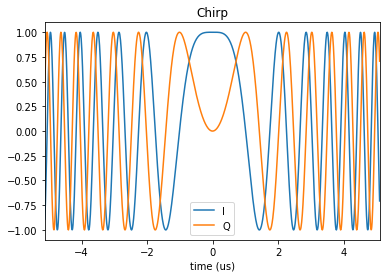

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fs = 100e6;
N = 1024;
bw = 5e6;

n = np.arange(0,N-1)-N/2;
t = n/fs;

s = np.exp(1j*np.pi*.5*(bw/t[-1])*(t**2));

plt.figure;
plt.plot(t*1e6,np.real(s),label='I');
plt.plot(t*1e6,np.imag(s),label='Q');
plt.xlabel("time (us)"); plt.title('Chirp'); plt.legend();
plt.autoscale(enable=True, axis='x', tight=True);

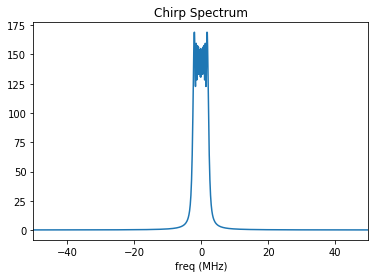

In [2]:
sfft = np.fft.fftshift(np.fft.fft(s));
f = n*(fs/N);
plt.figure;
plt.plot(f/1e6,np.abs(sfft));
plt.xlabel("freq (MHz)"); plt.title('Chirp Spectrum');
plt.autoscale(enable=True, axis='x', tight=True);

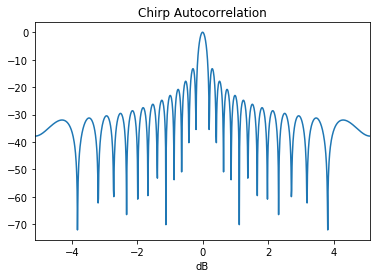

In [3]:
dfft = sfft * np.conj(sfft);
d = (1/N)*np.fft.fftshift(np.fft.ifft(dfft))
plt.figure;
plt.plot(t*1e6,20*np.log10(np.abs(d)));
plt.xlabel("time (us)"); plt.xlabel("dB"); plt.title('Chirp Autocorrelation');
plt.autoscale(enable=True, axis='x', tight=True);